<a href="https://www.kaggle.com/code/krviswanathan/udemy-courses-and-comments-data-analysis?scriptVersionId=115704641" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Introduction

   
Udemy is an online platform for learning and teaching. It has more than 213000 courses spanning over 75 languages. Courses on Udemy are useful for improving skills that are required for jobs. In this notebook, we will perform data analysis of Udemy courses and comments. There are two datasets provided:

* Course dataset and
* Comment dataset. 

The course dataset contains information about 210k courses offered on Udemy. The important information includes the title of a course, price, average rating, number of subscribers, number of lectures, category, subcategory, number of reviews, language, etc. The comment dataset contains nearly 9 million user comments for courses on Udemy.


# 2. Setup

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
#import langdetect
import plotly.express as px
import matplotlib.ticker as ticker
import ast

plotly.offline.init_notebook_mode (connected = True)

class color:
    BOLD = '\033[1m'
    END = '\033[0m'

# Load course dataset
courses = pd.read_csv("/kaggle/input/udemy-courses/Course_info.csv")

# Information about the course dataset
print(courses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [2]:
# Statistics for numerical columns
courses.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,209734.0,3.015403e+06,1.342558e+06,1769.0,1950733.50,3.292863e+06,4189458.500,4914146.00
price,209734.0,8.166553e+01,1.173178e+02,0.0,19.99,3.499000e+01,99.990,999.99
num_subscribers,209734.0,3.096992e+03,1.558132e+04,0.0,26.00,2.060000e+02,1435.000,1752364.00
avg_rating,209734.0,3.747179e+00,1.533711e+00,0.0,3.80,4.333334e+00,4.625,5.00
num_reviews,209734.0,2.443588e+02,2.458098e+03,0.0,3.00,1.700000e+01,74.000,436457.00
num_comments,209734.0,4.487459e+01,3.557731e+02,0.0,1.00,5.000000e+00,18.000,39040.00
num_lectures,209734.0,3.654839e+01,5.187196e+01,0.0,11.00,2.200000e+01,42.000,1095.00
content_length_min,209734.0,2.655589e+02,4.544487e+02,0.0,69.00,1.330000e+02,289.000,22570.00


In [3]:
courses.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


# 3. Course Dataset - EDA

## 3.1 Missing Values

In [4]:
# Checking for null values in the feature variables
print(color.BOLD + 'Missing values - Count: \n' + color.END)
print(courses.isnull().sum())
print('--'*20)

print(color.BOLD + 'Missing values - Percentage: \n' + color.END)
print(round(courses.isnull().mean() * 100, 2))

Missing values - Count: 

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64
----------------------------------------
Missing values - Percentage: 

id                    0.00
title                 0.00
is_paid               0.00
price                 0.00
headline              0.01
num_subscribers       0.00
avg_rating            0.00
num_reviews           0.00
num_comments          0.00
num_lectures          0.00
content_length_min    0.00
published_time        0.00
last_update_date      0.07
category          

Out of 210k courses, only 0.74% of data are missing.

## 3.2 Price distribution

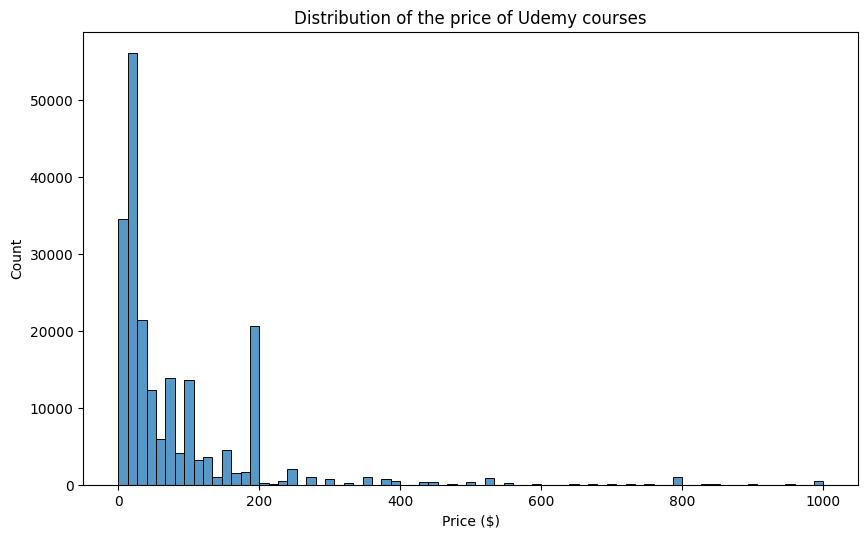

In [5]:
# Distribution of price of udemy courses
fig, ax = plt.subplots(figsize=(10,6), dpi=100)
sns.histplot(data=courses, x='price', bins=75)
plt.xlabel("Price ($)")
plt.title("Distribution of the price of Udemy courses");

<AxesSubplot:xlabel='price', ylabel='category'>

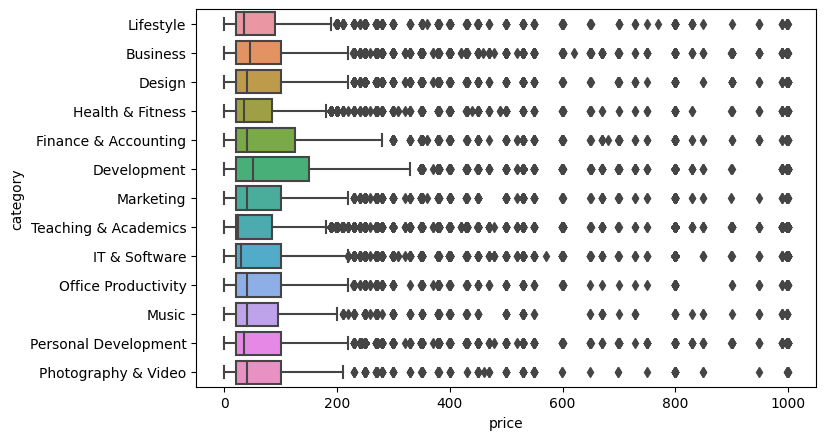

In [6]:
# Box plot showing the distribution of price across category
plt.figure(figsize=(8,5), dpi=100)
sns.boxplot(data=courses, x='price', y='category')

The above plots show the distribution of the `price` of Udemy courses as well as the category-wise distribution (boxplot). Most of the courses are priced between 0 and $\$$200. Not all the courses are in the paid category. About 21738 courses are offered at no cost whereas 187996 courses have to be bought at a price. For the paid category, nearly 20\% of the courses are sold at $\$$19.99, and about 8.34\% of the courses are sold at $\$$199.99. The share of free and paid courses is visualized in the seaborn count plot below. Overall, around 10\% of the courses are available for free and the remaining courses (89.64\%) have to be bought.

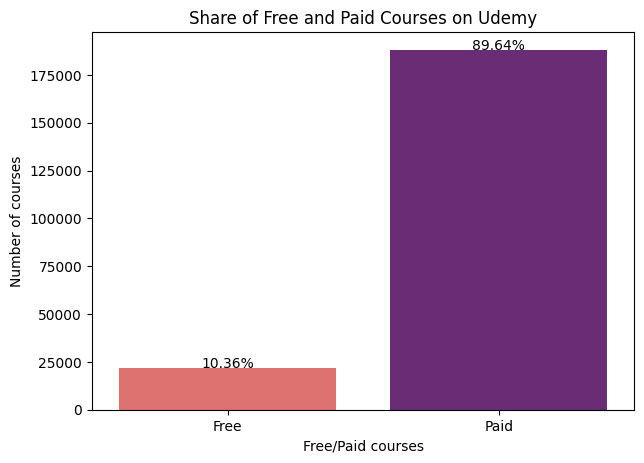

In [7]:
# Free or Paid Courses - Countplot
fig, ax = plt.subplots(figsize=(7,5), dpi=100)
ax = sns.countplot(data=courses, x='is_paid', palette='magma_r')
ax.set_xticklabels(labels=['Free', 'Paid'])
ax.set_xlabel("Free/Paid courses")
ax.set_ylabel("Number of courses")
ax.set_title("Share of Free and Paid Courses on Udemy")
percentage = round(courses['is_paid'].value_counts() * 100 /len(courses), 2)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')

## 3.3 Course Languages in Udemy

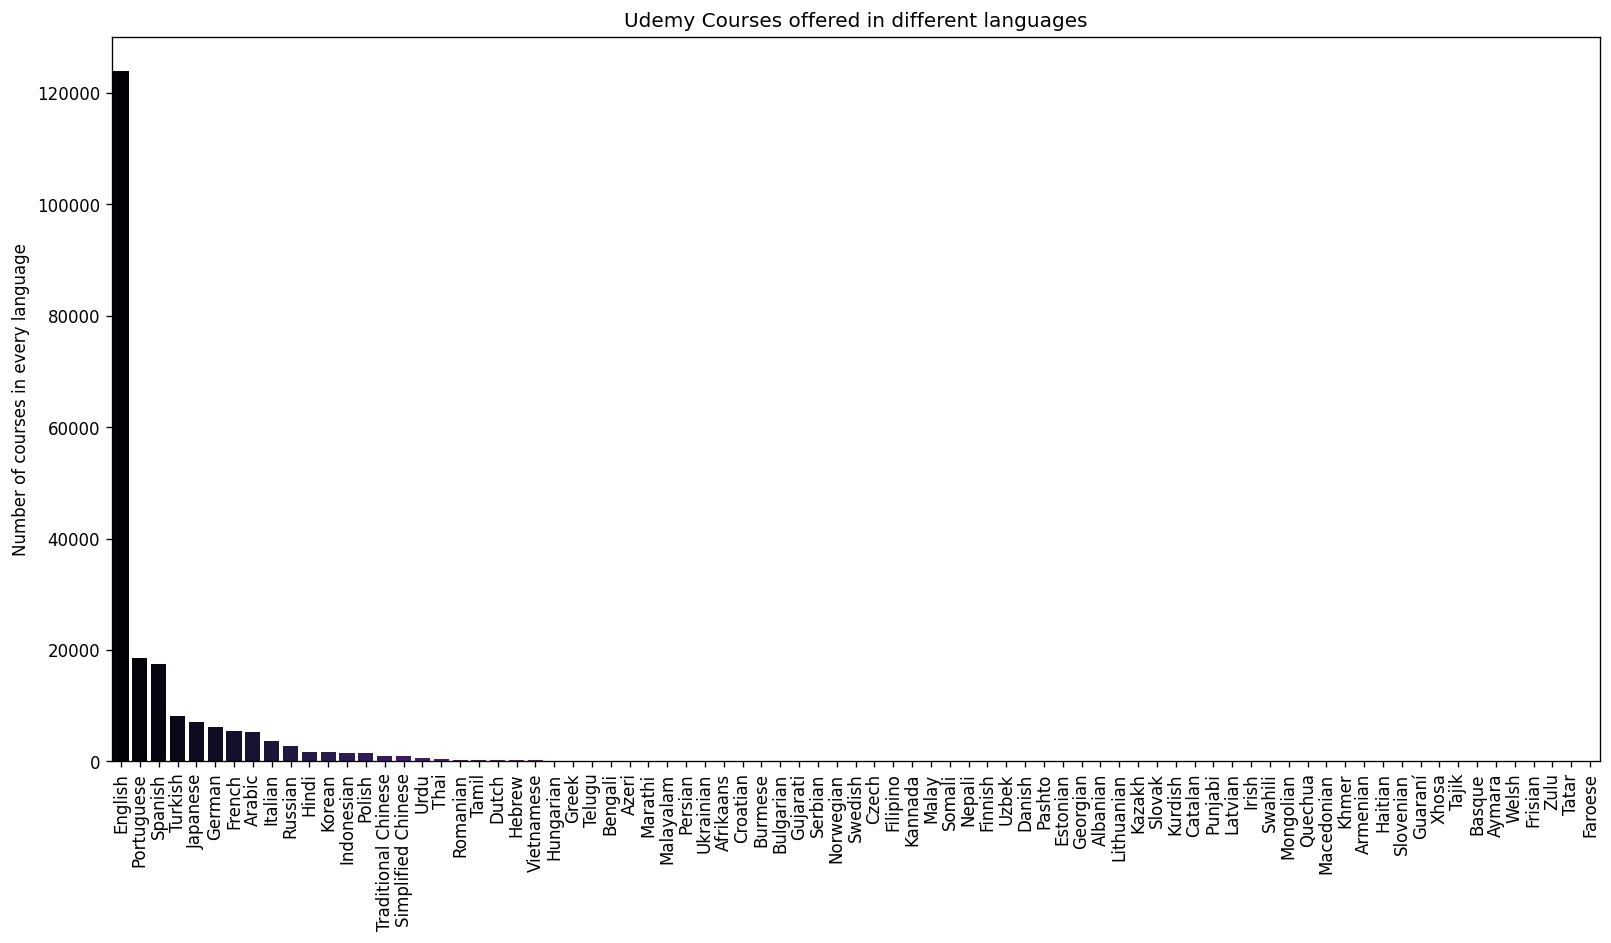

In [8]:
# Count plot for the number of courses in different langauges
plt.figure(figsize=(16, 8), dpi=120)
sns.countplot(data=courses, x='language', order=courses['language'].value_counts().index, palette='magma')
plt.xlabel("")
plt.ylabel("Number of courses in every language")
plt.title("Udemy Courses offered in different languages")
plt.xticks(rotation=90);

Based on the course dataset, there are 79 `languages` in which Udemy courses are offered. English (59%), Portugues (8.8%), and Spanish (8.3%) are the top three languages on Udemy. The top 15 languages in which the courses are offered are visualized in the pie chart shown below.

In [9]:
# Top 15 languages
share_of_languages_top_15 = round(courses['language'].value_counts() * 100 / len(courses), 2)[:15]

# Pie chart for top 15 languages visualization
fig = px.pie(share_of_languages_top_15, values=share_of_languages_top_15.values, 
             names=share_of_languages_top_15.index, hole=0.25,
            )
fig.update_traces(textposition='inside', texttemplate = '%{label}<br>%{value}%', rotation=150)
fig.update_layout(title_text='Top 15 languages in which courses are offered', title_x=0.5, showlegend=False)
fig.show()

## 3.4 Courses under different categories

### 3.4.1 Number of courses in each category

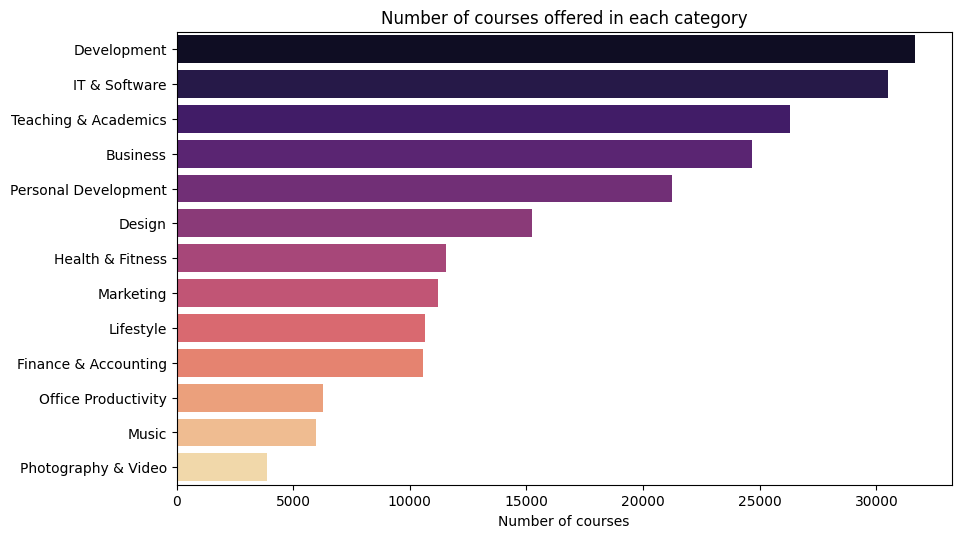

In [10]:
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(data=courses, y='category', order=courses['category'].value_counts().sort_values(ascending=False).index, palette='magma')
plt.xlabel("Number of courses")
plt.ylabel("")
plt.title("Number of courses offered in each category");

### 3.4.2 Number of subscribers in each category

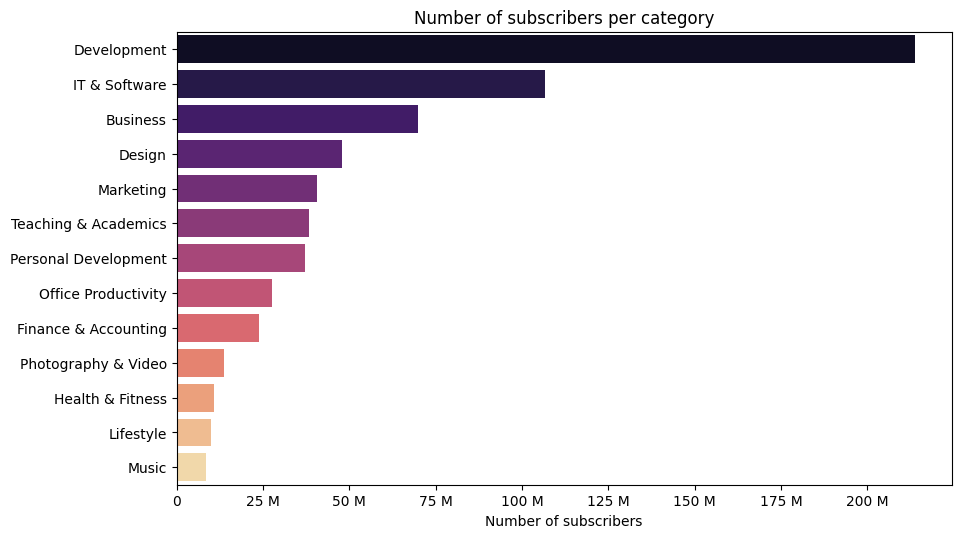

In [11]:
category_subs = courses.groupby('category')['num_subscribers'].agg('sum').sort_values(ascending=False)

# Bar plot to diplay number of subscribers across categories
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.barplot(y=category_subs.index, x=category_subs.values, palette='magma', ci=0)
ax.set_xlabel("Number of subscribers")
ax.set_ylabel("")
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.set_title("Number of subscribers per category");

The courses are covered under 13 `categories` and then these categories are further divided into 130 `subcategories`. There are 3818 unique `topics` under which different courses are offered. The category `Development` contains the most number of courses (31643), followed by `IT & Software` (30479) and `Teaching & Academics` (26293). The category `Development`  also topped the list for having the highest number of subscribers (~213 Million), followed by `IT & Software (106 Million)` and `Business` (70 Million).

### 3.4.3 Top 5 courses with highest number of reviews

In [12]:
my_cols = ['title', 'instructor_name', 'price', 'num_reviews', 'num_subscribers', 'num_comments', 'content_length_min']

def top5_courses(df, col):
    top5_df = df.nlargest(5, col).reset_index(drop=True)
    return top5_df[my_cols]

In [13]:
top5_courses(courses, 'num_reviews')

,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,199.99,436457.0,1612862.0,39040.0,1333.0
1,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,149.99,332598.0,1108811.0,36101.0,1264.0
2,The Web Developer Bootcamp 2022,Colt Steele,199.99,246624.0,823805.0,31001.0,3827.0
3,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,199.99,228108.0,771176.0,27723.0,3939.0
4,Angular - The Complete Guide (2022 Edition),Maximilian Schwarzmüller,189.99,172991.0,626304.0,24886.0,2082.0


### 3.4.4 Top 5 courses with highest number of subscribers

In [14]:
top5_courses(courses, 'num_subscribers')

,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,Java Tutorial for Complete Beginners,John Purcell,0.00,96582.0,1752364.0,14919.0,968.0
1,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,199.99,436457.0,1612862.0,39040.0,1333.0
2,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,149.99,332598.0,1108811.0,36101.0,1264.0
3,Automate the Boring Stuff with Python Programming,Al Sweigart,49.99,102876.0,1056369.0,13544.0,571.0
4,Machine Learning A-Z™: Hands-On Python & R In ...,Kirill Eremenko,199.99,162432.0,896340.0,22567.0,2670.0


### 3.4.5 Top 5 courses with highest number of comments

In [15]:
top5_courses(courses, 'num_comments')

,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,199.99,436457.0,1612862.0,39040.0,1333.0
1,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,149.99,332598.0,1108811.0,36101.0,1264.0
2,The Web Developer Bootcamp 2022,Colt Steele,199.99,246624.0,823805.0,31001.0,3827.0
3,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,199.99,228108.0,771176.0,27723.0,3939.0
4,The Complete Digital Marketing Course - 12 Cou...,Rob Percival,199.99,154985.0,706339.0,27540.0,1363.0


### 3.4.6 Top 5 courses with highest content length

In [16]:
top5_courses(courses, 'content_length_min')

,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,"Chemistry for IIT JEE Main & Advanced, NEET, A...",Aman Saurav,7.00,76.0,463.0,5.0,22570.0
1,Crush Your 2019 New Year's Resolution and Lear...,Mammoth Interactive,199.99,8.0,333.0,3.0,21353.0
2,NET ENGLISH COMPLETE COURSE,Kalyani Vallath,7.00,623.0,2397.0,78.0,17275.0
3,Comprehensive Human Psychology Course,Bilal Semih Bozdemir,99.99,4.0,536.0,1.0,15786.0
4,Kapsamlı Psikoloji Kursu,Bilal Semih Bozdemir,999.99,328.0,2384.0,54.0,15307.0


### 3.4.7 Most expensive Udemy courses

In [17]:
top5_courses(courses, 'price')

,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,"Oracle Veritabanı Programlama : SQL, PL/SQL, O...",Cihan Özhan,999.99,570.0,32834.0,93.0,1615.0
1,React Native ile iOS ve Android Uygulama Geliş...,Yasin Ugurlu,999.99,838.0,2940.0,141.0,557.0
2,Sıfırdan Wordpress Tema Yapımı,Ali Çınaroğlu,999.99,206.0,1015.0,50.0,470.0
3,Go Programlama Dili,Cihan Özhan,999.99,625.0,37154.0,79.0,1044.0
4,"SQL Server Veritabanı Programlama: Temel, Orta...",Cihan Özhan,999.99,1348.0,49938.0,151.0,1273.0


### 3.4.8 Subcategory Level Data Visualization

In [18]:
# At the subcategory level, the number of courses and subscribers are determined.
courses_subcat_df = courses.groupby(['category'])['subcategory'].value_counts().to_frame()
courses_subcat_df.columns = ['number of courses']
courses_subcat_df = courses_subcat_df.reset_index()

subscribers_subcat_df = courses.groupby(['category', 'subcategory'])['num_subscribers'].sum().to_frame()
subscribers_subcat_df.columns = ['number of subscribers']
subscribers_subcat_df = subscribers_subcat_df.reset_index()

# Sunburst chart for number of courses under each subcategory for different categories
fig = px.sunburst(courses_subcat_df, path=['category', 'subcategory'], 
                  values='number of courses', color='category',
                  color_continuous_scale='RdBu', width=600, height=600)
fig.update_layout(title_text='Number of courses offered in different subcategories', title_x=0.5)
fig.show()

# Sunburst chart for number of subscribers under each subcategory for different categories
fig = px.sunburst(subscribers_subcat_df, path=['category', 'subcategory'], values='number of subscribers',
                  color_continuous_scale='RdBu', width=600, height=600)
fig.update_layout(title_text='Number of subscribers in different subcategories', title_x=0.5)
fig.show()

We already know the `Development` category has the highest subscriber count (about 213 Million). Under the `Development` category, subcategories such as `Web Development` and `Programming Languages` have 76.6 Million and 58.5 Million subscribers respectively. The sunburst charts display the number of courses and subscribers at each subcategory level for different categories. The category `Music` has the least number of subscribers (about 8.5 Million) with the `Instruments` having the highest (about 3.9 Million) at the subcategory level.

## 3.5 Instructor Earnings

In [19]:
courses['earnings_$'] =  courses['price'] * courses['num_subscribers']

instructor_earnings = pd.DataFrame(courses.groupby('instructor_name')['earnings_$'].sum().round(2))
instructor_earnings = instructor_earnings.sort_values(by='earnings_$', ascending=False)
instructor_earnings['earnings_$'] = instructor_earnings['earnings_$'].apply(lambda x: "{:,}".format(x))

# Top 10 Instructors based on their earnings
print(color.BOLD + 'Top 10 instructors with their earnings in $:' + color.END)
instructor_earnings.head(10)

Top 10 instructors with their earnings in $:


,earnings_$
instructor_name,
Srinidhi Ranganathan,"1,735,131,639.91"
Learn Tech Plus,"1,198,360,877.57"
TJ Walker,"1,171,615,935.48"
Jose Portilla,"818,904,784.12"
YouAccel Training,"801,222,163.35"
Creative Online School,"638,075,197.91"
Robert (Bob) Steele,"629,703,391.45"
Kirill Eremenko,"543,566,459.29"
Joseph Delgadillo,"543,485,234.46"


There are 72731 `instructors` on the Udemy platform. The `total income` of the instructors is calculated by multiplying the 'price' and 'num_subscribers' columns. The above data frame shows the top 10 instructors with their income. Note that for the `earnings` calculation, discounts and coupons offered are not considered as their information is not available.

## 3.6 Year-wise data visualization

In [20]:
# published_time column is cleaned and then converted into a datatime object
courses['published_time'] = pd.to_datetime(courses['published_time'].str[0:10])
courses['published_year'] = courses['published_time'].dt.year
courses['published_month'] = courses['published_time'].dt.month_name()

# Group the year column and perform operations for data visualization
courses_year_count = courses['published_year'].value_counts()

courses_num_subs = courses.groupby('published_year')['num_subscribers'].sum()

courses_num_reviews = courses.groupby('published_year')['num_reviews'].sum()

courses_num_comments = courses.groupby('published_year')['num_comments'].sum()

courses_num_lectures = courses.groupby('published_year')['num_lectures'].sum()

group_courses_year = pd.pivot_table(courses, index='published_year', 
                               values=['id', 'num_subscribers', 'num_reviews', 'num_comments', 'num_lectures'], 
                               aggfunc={'id': len, 'num_subscribers': np.sum, 'num_reviews':np.sum, 
                                        'num_comments':np.sum, 'num_lectures':np.sum})

print(color.BOLD + 'Year-wise count and sum values for different features:' + color.END)
group_courses_year

Year-wise count and sum values for different features:


,id,num_comments,num_lectures,num_reviews,num_subscribers
published_year,,,,,
2010,4,408.0,68.0,1842.0,33727.0
2011,57,13170.0,4555.0,60041.0,1328159.0
2012,464,71397.0,25592.0,358467.0,7230026.0
2013,1778,233046.0,76847.0,1123207.0,14813615.0
2014,3404,461284.0,140262.0,2192152.0,27642396.0
2015,7102,1113930.0,298958.0,6042455.0,56527397.0
2016,7975,1470159.0,367520.0,7909710.0,68028864.0
2017,12258,1712435.0,561191.0,9486975.0,81376285.0
2018,20653,1568422.0,941243.0,8878711.0,92373156.0


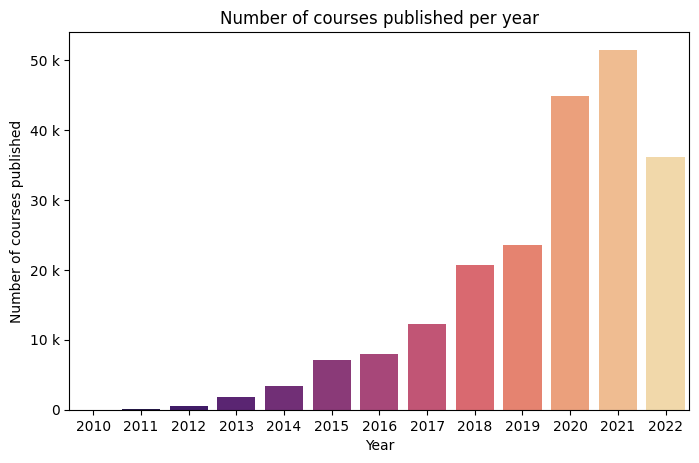

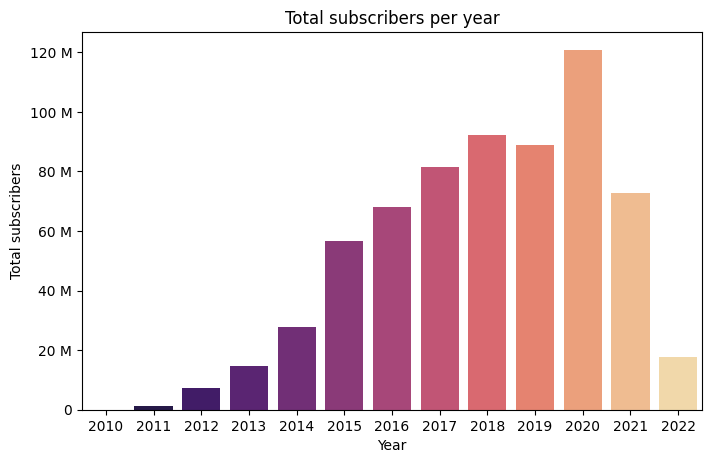

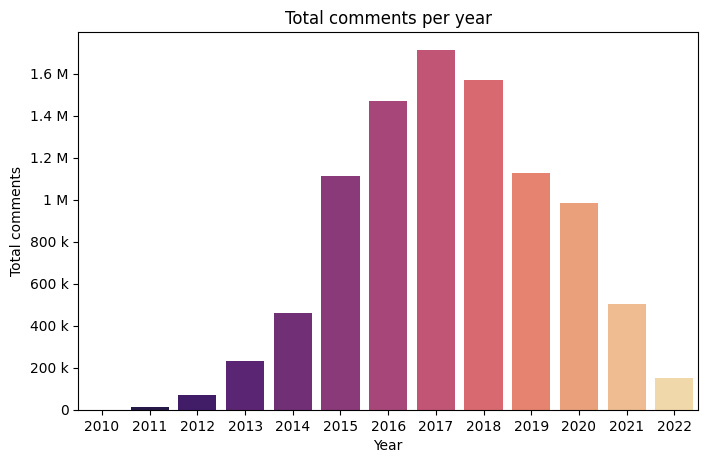

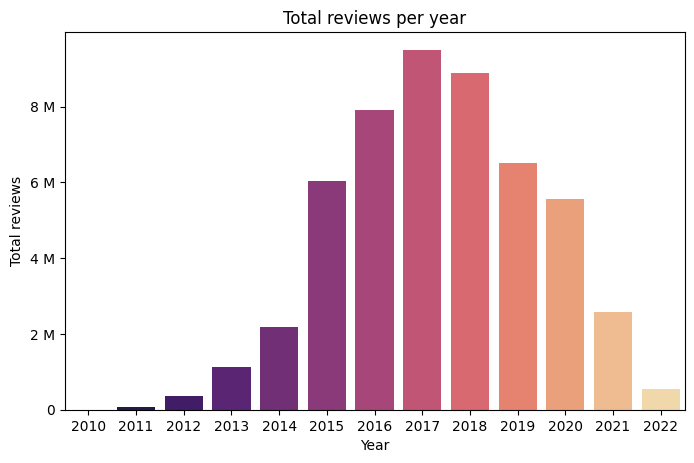

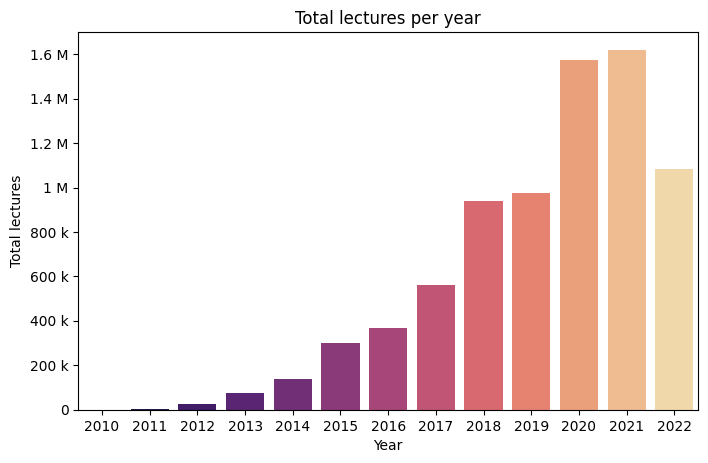

In [21]:
# Visualization of year-wise feature data
dict_cols = dict({'id': 'Number of courses published', 'num_subscribers': 'Total subscribers', 
                  'num_comments': 'Total comments', 'num_reviews': 'Total reviews',
                 'num_lectures': 'Total lectures'})

for key, val in dict_cols.items():
    df = group_courses_year
    fig, ax = plt.subplots(figsize=(8,5), dpi=100)
    sns.barplot(data=df, x=df.index, y=df[key], palette='magma')
    ax.set_xlabel("Year")
    ax.set_ylabel(val)
    ax.set_title(f'{val} per year')
    ax.yaxis.set_major_formatter(ticker.EngFormatter());

***

# 4. Comments Dataset - EDA


The comments dataset contains six feature columns and nearly 9.5 million row values. The `comment` column and `rate` column are important for data analysis.


In [22]:
# Load comments dataset
comments = pd.read_csv("/kaggle/input/udemy-courses/Comments.csv")

# Information about comments dataset
comments.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9411727 entries, 0 to 9411726
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id            9411727 non-null  int64  
 1   course_id     9411727 non-null  int64  
 2   rate          9411727 non-null  float64
 3   date          9411727 non-null  object 
 4   display_name  9336365 non-null  object 
 5   comment       9405394 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 430.8+ MB


In [23]:
comments.head()

,id,course_id,rate,date,display_name,comment
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...


## 4.1 Missing Values

In [24]:
# Display the features with missing values 
print(color.BOLD + 'Number of missing values:' + color.END)
print(comments.isnull().sum())
print("---"*20)
print(color.BOLD + 'Percentage of missing values:' + color.END)
print(round(comments.isnull().mean() * 100, 2))

Number of missing values:
id                  0
course_id           0
rate                0
date                0
display_name    75362
comment          6333
dtype: int64
------------------------------------------------------------
Percentage of missing values:
id              0.00
course_id       0.00
rate            0.00
date            0.00
display_name    0.80
comment         0.07
dtype: float64


In [25]:
# Dropping rows with any column having NaN.
comments = comments.dropna(axis=0).reset_index(drop=True)

# Mapping the course title from the courses dataframe to comments dataframe
dict_id = dict(zip(courses['id'], courses['title']))
comments['course_title'] = comments['course_id'].map(dict_id)

The `comments dataset` and `courses dataset` both have a common column (`course_id`). To identify the course title against which the reviewers made comments, a new column named `course_title` for the comments data frame is created by mapping the `course_id` from the courses dataset.

## 4.2 Creating new column named "review" based on course ratings


By going through a sample of the `comments` dataframe, the `rate` column and `comments` column are related. Now we create a new label based on the `rate` column in the `comments` dataframe. The rate value ranges between 0.5 and 5.0. The new label, `review`, is positive if the rate value is greater than 3.0 and neutral if the rate is equal to 3.0. Otherwise, the review is negative. This new variable can be used as a target label for classification purposes.

In [26]:
# New column 'review' based on 'rate' column.
comments['review'] = pd.cut(comments['rate'], bins=[0, 2.5, 3.0, 5.0], labels=['Negative', 'Neutral', 'Positive'])
#comments['review'] = comments['rate'].apply(lambda x: 'Positive' if x >= 3.0 else 'Negative')
comments.head()

,id,course_id,rate,date,display_name,comment,course_title,review
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...,Ultimate Chess Openings and Tactics,Negative
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...,Osteo eCourses - Working With The Electromagne...,Positive
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...,Legislación Alimentaria en Argentina,Positive
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...,How To Breakdance MASTERCLASS - Street Dance T...,Positive
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...,Digital Marketing for Filmmakers,Positive


For the classification problem, we will be considering the `comment` column and the `review` target label. The main goal of this section is to analyze the comments made by the users and then identify the language of the comments. For this purpose, we need to filter the `comment` column as it contains several special characters, symbols and emojis.

In [27]:
# Using strip() method to remove the newline character from a string. 
# The strip() method will remove both trailing and leading newlines from the string. 
# It also removes any whitespaces on both sides of a string.
comments['comment'] = comments['comment'].str.replace("\n", " ")

# Remove special characters from the comment column
spl_ch = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '=', '_', '+'
         '[', ']', '{', '}', '|', ':', '"', ';', "'", ',', '.', '/', '<', '>', '`', '~', '?']

for ch in spl_ch:
    #mask = comments['comment'].str
    #comments = comments.drop(comments[mask].index, axis=0)
    comments = comments[comments['comment'] != ch]
    
comments = comments.reset_index(drop=True)

# Keeping the dataframe without digits characters in 'comment' column
comments = comments[~comments['comment'].str.isdigit()].reset_index(drop=True)

## 4.3 Detecting the language of a comment

In the `comments` dataframe, most of the features are unique identifiers except the columns `date`, `comment`, and `review`. We can create a new column that stores the languages in which the comments are made. With the `langdetect` module, we can identify the language of a comment made by a student. The `langdetect` module is a direct port of Google’s language-detection library that supports 55 languages. 
    
Although the special characters and digits in the `comment` column are removed, there are rows with symbols, emojis, mix of multiple characters and symbols. 

We use the language detect library which checks for the language of a sentence. If the detect operation comes across any unknown symbol, we will store the language as 'no'. We can delete the rows with 'no' language later.

In [28]:
# Since the dataset is really huge, it would take several hours for the 'langdetect' 
# to go through all the rows. To save time on kaggle, the DataFrame is already processed, 
# created 'comment_language' column and saved as a separate 'csv' file (udemy_comments_languages.csv). 
# So, I am attaching the code below for performing the language detection operation for reference purpose.
    
# Detecting the language of the comments made by the users

# langdet = []
    
# for idx, val in comments['comment'].iteritems():                                         
#     try:                                                          
#         lang=langdetect.detect(val)                                      
#     except:                                                       
#         lang='no'
#         print("This row throws error:", comments.iloc[idx])
#         print("----"*10)
#         print("\n")
#     langdet.append(lang)    

# langdet_df = pd.DataFrame(langdet, columns=['Language'])
# langdet_df.to_csv('udemy_comments_languages.csv', index=False)

In [29]:
# Reading the result of the langdetect operation on the 'comment' column of the DataFrame.
langdet_df = pd.read_csv('/kaggle/input/udemy-courses-additional-files/udemy_comments_languages.csv')

# Sample data of the language detect dataframe file
langdet_df.sample(10)

,Language
5962016,en
3638494,en
7866999,en
6997628,tr
7479128,en
1900042,en
1670899,en
6760714,en
8158443,en
3701345,pt


In [30]:
# The language column of the langdet_df DataFrame contains 'no' for unrecognized language.
langdet_df[langdet_df['Language'] == 'no'].sample(5)

,Language
3362693,no
7207795,no
7756319,no
1575858,no
7544561,no


In [31]:
print(color.BOLD + 'Total number of unrecognized comments:' + color.END, len(langdet_df[langdet_df['Language'] == 'no']))
print(color.BOLD + 'Shape of the langdet_df DataFrame:' + color.END, langdet_df.shape)
print(color.BOLD + 'Shape of the comments DataFrame:' + color.END, comments.shape)

Total number of unrecognized comments: 35757
Shape of the langdet_df DataFrame: (9316327, 1)
Shape of the comments DataFrame: (9316327, 8)


Note that there may be some comments misclassified as 'no' due to few word counts or special characters in between the words.

In [32]:
# Copying the elements of the 'comments' dataframe to a new dataframe named 'comments_df'
comments_df = comments.copy()

# Storing the comment language in comments_df dataframe
comments_df['comment_language'] = langdet_df['Language'].copy()

# Sample dataframe showing the languages for the comment column
comments_df.sample(5, random_state=88)

,id,course_id,rate,date,display_name,comment,course_title,review,comment_language
2188070,12961586,1126964,5.0,2018-01-20T23:48:19-08:00,Amanda,This is a good short course. It has a small se...,Learn Audio Editing for Beginners,Positive,en
3288271,44047002,1675620,2.0,2020-01-20T11:34:46-08:00,Ana Paula,Não era o que eu imaginava. Esperava um curso ...,Mapeamento de Processos (BPM) - Do Zero ao As Is,Negative,pt
595083,111045872,4452832,3.0,2022-04-03T08:08:50-07:00,Samuel,When the strategic content does come it comes ...,Virtual Real Estate Investing in the Metaverse,Neutral,en
5325783,32424782,1067344,4.0,2019-06-05T07:40:05-07:00,Anthony,"very clearly explained, even though i know som...",Arduino Programming and Hardware Fundamentals ...,Positive,en
2403346,25202784,1023142,4.0,2019-01-02T11:56:30-08:00,Terry,"Yes, I've configured/used these 3 technologies...",Oracle 11g Dataguard Administration,Positive,en


In [33]:
# Sample dataframe showing the detected hindi language for the comments
comments_df[comments_df['comment_language'] == 'hi'].sample(5, random_state=88)

,id,course_id,rate,date,display_name,comment,course_title,review,comment_language
116974,125969184,3650220,5.0,2022-10-13T04:51:07-07:00,Devesh,आपको कहीं ज़ाने की आवस्यकता नहीं है। बहुत easy...,C Programming Language in Hindi- जानें सी प्रो...,Positive,hi
671895,109359330,2875518,5.0,2022-03-10T23:52:37-08:00,Diya,उत्तम! प्रस्तुतकर्ता जानता है कि वह किस बारे म...,Sales Pro MATE Guide or How to Sell Any Idea t...,Positive,hi
1535327,57702529,2788558,5.0,2020-06-07T09:40:58-07:00,Bindas,"महान शिक्षण, अच्छी व्याख्या, और इस पाठ्यक्रम क...",The Best Adobe Premiere Pro Video Editing Mast...,Positive,hi
5180725,65965054,1123098,5.0,2020-09-09T18:10:43-07:00,Yavdhesh,"नमस्ते, यह पाठ्यक्रम बहुत ही अच्छा था। मैने बह...","Reactive Angular Course (with RxJs, Angular 14)",Positive,hi
1061347,13931562,1508796,5.0,2018-02-18T23:45:38-08:00,Ayushman,अमेज़न के मुकाबले आई.बी.एम ब्लूमिक्स यकीनन बेहत...,Cloud Computing with IBM Bluemix,Positive,hi


In [34]:
# Removing 'no' class of 'comment_language' column
comments_df = comments_df[~(comments_df['comment_language'] == 'no')].reset_index(drop=True)

print(color.BOLD + 'Shape of the comments_df DataFrame:' + color.END, comments_df.shape)

Shape of the comments_df DataFrame: (9280570, 9)


In [35]:
# Share of positive and negative reviews
review_counts = comments_df['review'].value_counts()

perc_pos = str(np.round(comments_df['review'].value_counts()[0] * 100 / (len(comments_df)), 2)) + '%'
perc_neg = str(np.round(comments_df['review'].value_counts()[1] * 100 / (len(comments_df)), 2)) + '%'
perc_nut = str(np.round(comments_df['review'].value_counts()[2] * 100 / (len(comments_df)), 2)) + '%'

# Pie chart showing the share of positive and negative reviews in percentage

fig = px.pie(review_counts, values=review_counts.values, names=review_counts.index, hole=0.3,
             color_discrete_sequence=px.colors.qualitative.D3)
fig.update_traces(textposition='inside', 
                  text = (perc_pos, perc_neg, perc_nut) ,
                  textinfo='label+text', rotation=98)
fig.update_layout(title_text='Review of Udemy Courses', title_x=0.5, showlegend=False)
fig.show()

The above pie chart shows the share of each review class for the `comments_df` dataframe. Nearly 90% of the reviews are `positive` whereas 5% of the reviews falls under `negative` class. The remaining 4% reviews are `neutral`.

In [36]:
# Reading languages_code.txt
# The text file contains a tuple list of language codes (as of ISO 639-1)

with open ('/kaggle/input/udemy-courses-additional-files/languages_code.txt') as f:
    data = f.read()
    
languages_code = ast.literal_eval(data)

# Creating dictionary of language codes
dict_languages = dict(languages_code)

# There are two versions of chinese language: 
# 'zh-cn' - Traditional chinese and 'zh-tw' - Chinese (Taiwan)
# We will give a common 'chinese' code (zh) for both of these languages
mask = (comments_df['comment_language'] == 'zh-cn') | (comments_df['comment_language'] == 'zh-tw')
comments_df.loc[mask, 'comment_language'] = 'zh'

# Transforming language codes into actual language names for readability
comments_df['comment_language'] = comments_df['comment_language'].map(dict_languages)
comments_df.head()

,id,course_id,rate,date,display_name,comment,course_title,review,comment_language
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think. ...,Ultimate Chess Openings and Tactics,Negative,English
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...,Osteo eCourses - Working With The Electromagne...,Positive,English
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...,Legislación Alimentaria en Argentina,Positive,Spanish
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...,How To Breakdance MASTERCLASS - Street Dance T...,Positive,English
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...,Digital Marketing for Filmmakers,Positive,English


In [37]:
languages_count = comments_df['comment_language'].value_counts()

fig = px.pie(languages_count, values=languages_count.values, names=languages_count.index, hole=0.25)
fig.update_traces(textposition='inside',
                 textinfo='label+percent', rotation=150)
fig.update_layout(title_text='Share of Languages in Comments', title_x=0.46, showlegend=False)
fig.show()

The data analysis of the `comment_language` column reveals that there are 52 languages in which the users commented. Out of 52 languages, English was the widely used language for commenting about the quality of the courses followed by Spanish (9.67\%) and Portuguese (8.92\%). There are a few comments that are misclassified due to insufficient word length and a mix of some languages (as shown below).

In [38]:
# Here is an example of a comment written in both English and Tamil.
comments_df.iloc[2767]['comment']

"Very interesting in Learning Tanglish ( Tamil + English = Tanglish ) . Keep adding MBA Core Papers and Elective Paper's in Tanglish , so Tamilnadu students will subscribe and learn easily and score more in their college exams.  ஆங்கிலம் கலந்த தமிழில் கற்பதற்கு சுலபமாக உள்ளது. MBA பாடத்தில் உள்ள core papers மற்றும் elective papers  உள்ள முழுமையான பாடங்களை உடெமி இனைய கல்வி கற்கும் இணையத்தளத்தில் பதிவு செய்து தமிழ்நாட்டில் உள்ள வணிக மேலாண்மை பயிலும் முதுகலை மாணவர்களுக்காக உங்கள் உடெமி தலத்தில் விற்பனை செய்யுங்கள். மிகவும் உதவிகரமாக இருக்கும்.  நன்றி                                                                                                       ப. பிரேம்நாத்.                                                                                                                         MBA                                                                                        VIT  பல்கலைக்கழகம்                                                                                               வெள்ள

## 4.4 Year-wise Comment Analysis

In [39]:
# Cleaning the date column and keeping only the year, month and day values.
comments_df['date'] = comments_df['date'].str[0:10]

# Converting the object datatype into datetime datatype
comments_df['date'] = pd.to_datetime(comments_df['date'])

# Creating new columns for year and month based on date column
comments_df['year'] = comments_df['date'].dt.year
comments_df['month'] = comments_df['date'].dt.month_name()

comments_df.head()

,id,course_id,rate,date,display_name,comment,course_title,review,comment_language,year,month
0,88962892,3173036,1.0,2021-06-29,Rahul,I think a beginner needs more than you think. ...,Ultimate Chess Openings and Tactics,Negative,English,2021,June
1,125535470,4913148,5.0,2022-10-07,Marlo,Aviva is such a natural teacher and healer/hea...,Osteo eCourses - Working With The Electromagne...,Positive,English,2022,October
2,68767147,3178386,3.5,2020-10-19,Yamila Andrea,Muy buena la introducción para entender la bas...,Legislación Alimentaria en Argentina,Positive,Spanish,2020,October
3,125029758,3175814,5.0,2022-09-30,Jacqueline,This course is the best on Udemy. This breakd...,How To Breakdance MASTERCLASS - Street Dance T...,Positive,English,2022,September
4,76584052,3174896,4.5,2021-01-30,Anthony,I found this course very helpful. It was full ...,Digital Marketing for Filmmakers,Positive,English,2021,January


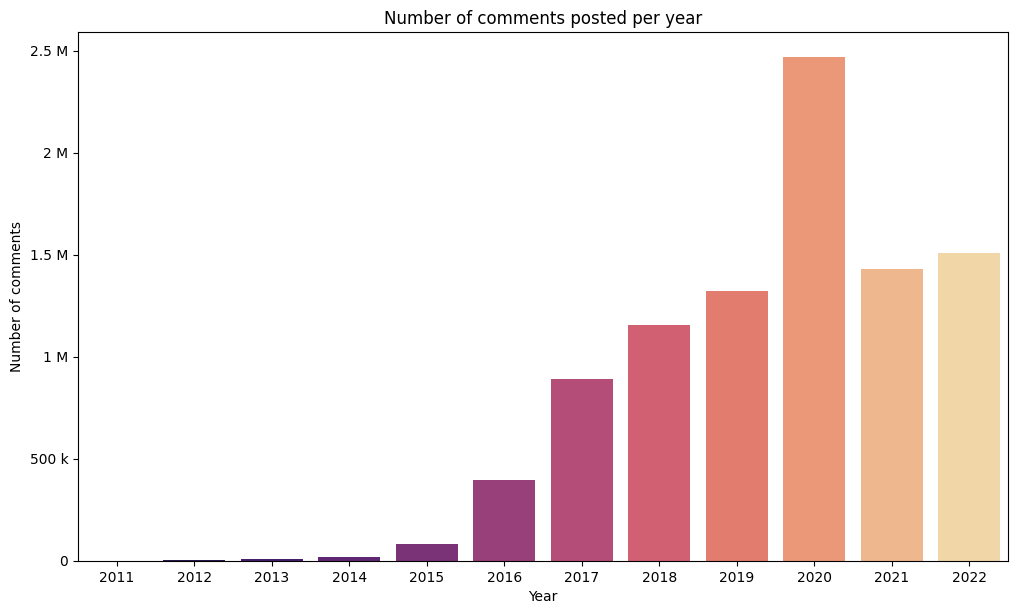

In [40]:
# year-wise arranging comments
year_comments = comments_df.groupby('year')['comment'].count()

# Barplot to show the number of comments per year
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)
sns.barplot(x=year_comments.index, y=year_comments.values, palette='magma')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_ylabel("Number of comments")
ax.set_xlabel("Year")
ax.set_title("Number of comments posted per year");

The above bar plot displays the total comments made every year. Udemy was started in the year 2010. During the initial years up to 2016, less than 500k comments were posted. Since then, the number of comments started to go up and reached a maximum of nearly 2.5 million comments in 2020. Further, the comments posted per month for the year 2020 are also studied (shown below).

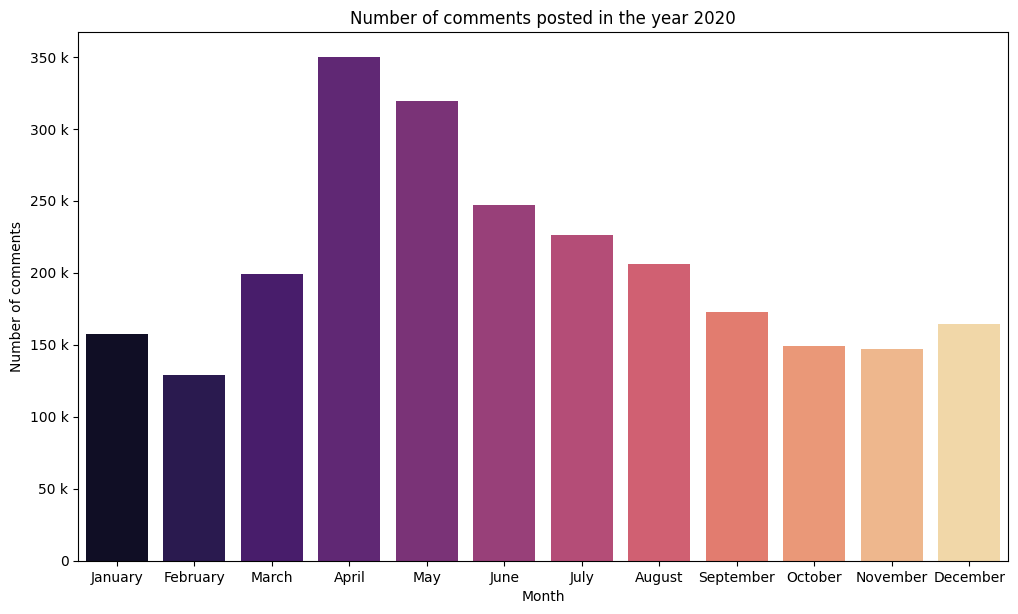

In [41]:
# Month-wise breakup of comments for the year 2020
year_2020 = comments_df[comments_df['year'] == 2020]
year_2020_month = year_2020.groupby('month')['comment'].count()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Barplot to visualize the comments distribution for different months in 2020
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)
sns.countplot(data=year_2020, x=year_2020['month'], palette='magma', order=month_order)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_ylabel("Number of comments")
ax.set_xlabel("Month")
ax.set_title("Number of comments posted in the year 2020");

# 5. Conclusion

The two datasets related to Udemy courses and comments are investigated with the help of data analysis tools. For both datasets, the relationship between features is analyzed, and created new columns from the existing features. Following is the summary of the analysis performed:
    
1. Nearly 20% of the courses are priced at $\$$19.99. Of the total courses, around 10\% of the courses are free of charge.

2. Courses are offered in 79 languages and 59\% of the courses are taught in English.

3. The 'development' category has the highest number of courses and subscribers.

4. From the comments dataset analysis, about 91\% of the comments are positive about the courses, 5\% of the comments are negative and the remaining comments are neutral.

5. English is the most preferred language for posting comments. It is followed by Spanish and Portuguese.

6. The year 2020 saw the maximum number of comments posted on Udemy.


# 6. References

1. [Language detection library](https://pypi.org/project/langdetect/)
2. [Python Tuple Lists with language codes](https://gist.github.com/alexanderjulo/4073388)
3. [Udemy Courses Datasets](https://www.kaggle.com/datasets/hossaingh/udemy-courses)